In [1]:
# Include all the necessary packages, 
import random
import pandas as pd # pandas for data manipulation and analysis
import numpy as np # numpy to handle multi-dimensional arrays and matricies
import matplotlib # matplotlib for pixel plot
import matplotlib.pyplot as plt

## Read the database and watch the records

In [2]:
#  Kaggle database for emotion detection
df = pd.read_csv('fer2013.csv')
# Print the front content of the databse
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [3]:
# Print the end of the database
df.tail()

,emotion,pixels,Usage
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest
35886,2,19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...,PrivateTest


## Convert the database to view the images

In [4]:
# Convert the pixel column values into a Python list object
pixels = df['pixels'].tolist()
emotions = df['emotion'].tolist()

# The fer2013 database contains 48x48 face images so we create two variables 
# to store the width and the height of the image
width, height = 48, 48

# Convert each pixel set (pixel array) to a 48x48 image and
# create a list called faces to store each face image
faces = []
for pixel_sequence in pixels:
    # Use Python's list comprehension because it's quicker than a single for cycle
    face = [int(pixel) for pixel in pixel_sequence.split(' ')]
    # Reshape face array to matches the 48x48 face images
    face = np.asarray(face).reshape(width, height)
    # Add the converted face image to the faces list
    faces.append(face.astype('uint8'))

# Convert the list to a numpy array
faces = np.asarray(faces)
emotions = np.asarray(emotions)

# Create a dictionary for identify the emotion
emotion_dict = {0:"Angry", 1:"Disgust", 2:"Fear", 3:"Happy", 4:"Sad", 5:"Surprise", 6:"Neutral"}

## Database visualization

In [5]:
# View "number_of_imgs" random images from an image path -- (all: faces, train: X_train, validation: X_valid, test: X_test)
def view_random_images(images=faces, emotions=emotions, number_of_imgs=10):
    # Set starting values
    idxs = np.random.randint(0, images.shape[0], size=number_of_imgs)
    face_img = [images[idx] for idx in idxs]
    # Set width and height to inch unit
    figure = plt.figure(figsize=(15,15))
    
    # Iterate through the images
    for i in range(number_of_imgs):
        subp = figure.add_subplot(10,10,i+1)
        # Setting the gray colourmap
        subp.imshow(face_img[i], cmap=matplotlib.cm.gray)
        # Naming the emotion of the selected random picture with the use of emotion_dict
        subp.title.set_text(emotion_dict[(emotions[idxs[i]])])
        plt.xticks([])
        plt.yticks([])
        plt.tight_layout()
    plt.show()

# View an image by an "id" from an image path -- (all: faces, train: X_train, validation: X_valid, test: X_test)
def view_image_by_id(idx, images=faces):
    fig = plt.figure()
    # User can pick one image from the database, and set gray colourmap
    imgplot = plt.imshow(images[idx], cmap=matplotlib.cm.gray)
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
    plt.show()  

# View "num_per_categories" random images from all of the unique categories 
# from an image path-- (all: faces, train: X_train, validation: X_valid, test: X_test)
def unique_category_view(num_per_categories=1, images=faces, emotions=emotions):
    unique_emotions = df.emotion.unique()
    figure = plt.figure(figsize=(15,15))
    plot_idx = 0
    # Iterate through the subcategories
    for emotion in unique_emotions:
        idx = df[df.emotion == emotion].sample(n=num_per_categories).index.values
        for i in idx:
            subp = figure.add_subplot(7,7,plot_idx+1)
            # Setting the gray colourmap
            subp.imshow(images[i], cmap=matplotlib.cm.gray)
            # Naming the emotion of the selected random picture with the use of emotion_dict
            subp.title.set_text(emotion_dict[emotions[i]])
            plt.xticks([])
            plt.yticks([])
            plt.tight_layout()
            plot_idx += 1    

## Execute the written functions
## 1. View random faces from the complete database

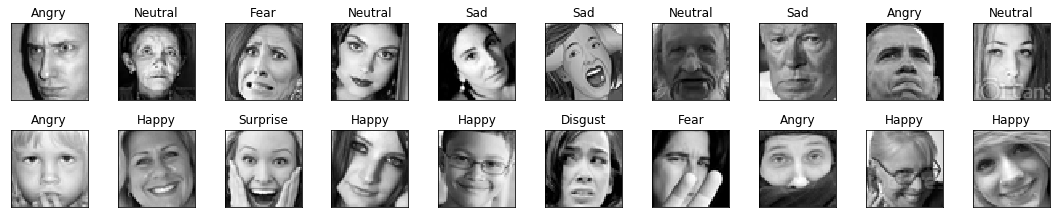

In [6]:
view_random_images(number_of_imgs=20)

## 2. View a face by a specified id

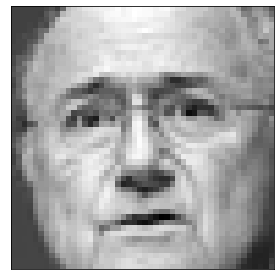

In [7]:
view_image_by_id(idx=5)

## 3. View faces from unique categories

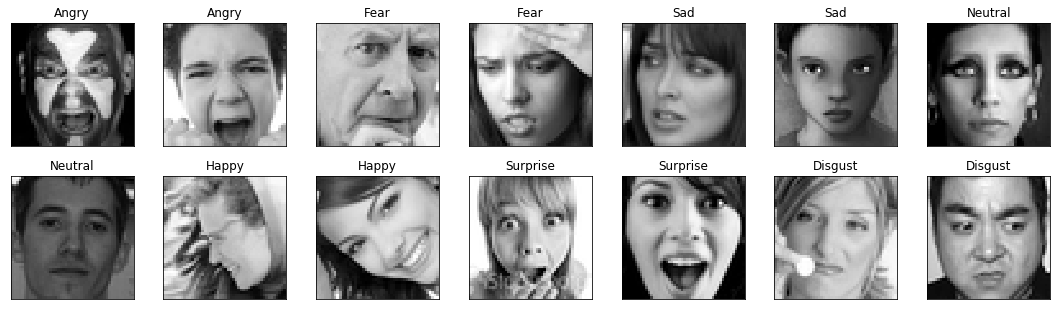

In [8]:
unique_category_view(num_per_categories=2)

## Plot the number of faces per categories

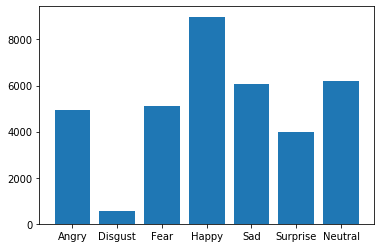

In [9]:
# Count the number of faces in each emotion 
value_counts = df['emotion'].value_counts().sort_index()
fig, ax = plt.subplots()
# Naming the columns as emotions
x_ticks_labels = [emotion_dict[i] for i in range(len(value_counts))]
plt.bar(range(0, len(value_counts)), value_counts)
plt.xticks(range(0, len(value_counts)), x_ticks_labels)
plt.show()

## Do some image augmentation

<p>As we can see the dispersion of the images by faces is not well balanced, so we balance it with image augmentation techniques. </p>

In [10]:
from PIL import Image # Use of Python Image Library
from scipy import ndimage # Use the SciPy library for scientifical computing

In [11]:
# Different image augmentation techniques

# Function to show two image side by side
def display_side_by_side(img1, img2):
    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(img1, cmap=matplotlib.cm.gray)
    ax[0].axis('off')
    ax[1].imshow(img2, cmap=matplotlib.cm.gray)
    ax[1].axis('off')

# Function to rotate any picture
def rotate_img(idx):
    # Choose a random rotation angle
    angle = np.random.choice(np.random.uniform(-45,45,100))
    # Copy the image
    nimg = np.copy(faces[idx])
    # Rotate the selected face with the random angle
    rot_img = ndimage.rotate(nimg, angle)
    # Keeping the original rate of height and width
    height, width = faces[idx].shape
    rot_img = Image.fromarray(rot_img).resize((width,height))
    return rot_img

# Function to blur a selected picture
def blur_img(idx):
    nimg = np.copy(faces[idx])
    # Set the value of the blur (Value is a random number between 0 and 1.5)
    sigma = np.random.random_sample()*1.5
    # Bluring the image with the help of Gaussian filter
    blurred_img = ndimage.gaussian_filter(nimg, sigma=sigma)
    return blurred_img

def flip_img(idx):
    nimg = np.copy(faces[idx])
    # Vertical flip the image
    flipped_img = np.fliplr(nimg)
    return flipped_img

# Function to add noise to the selected picture
def add_noise(idx):
    nimg = np.copy(faces[idx])
    noise = (np.random.normal(0,0.01,size=(48, 48)) * 255).astype(np.uint8)
    nimg += noise
    noisy_img = np.clip(nimg, 0, 255)
    return noisy_img

# Function which call randomly all the previous methods
def augment_img(idx):
    methods = [rotate_img, blur_img, flip_img, add_noise]

    method = np.random.choice(methods)
    return method(idx)

## View each of the transformation

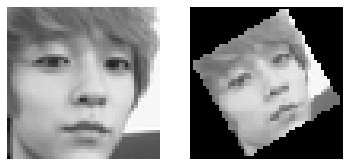

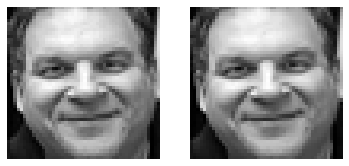

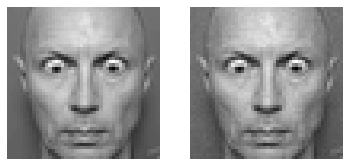

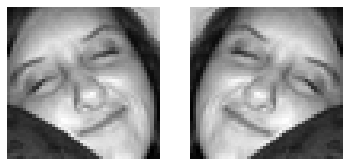

In [12]:
rot_img = rotate_img(13)
display_side_by_side(faces[13], rot_img)

blurred_img=blur_img(14)
display_side_by_side(faces[14], blurred_img)

noisy_img=add_noise(15)
display_side_by_side(faces[15], noisy_img)

flipped_img=flip_img(16)
display_side_by_side(faces[16], flipped_img)

## Balance the database with transformed images

In [13]:
# We use the augmentation techniques to equalize each emotion section to the same number
pictures_to_make = [np.max(value_counts) - value_counts[i] for i in range(len(value_counts))]

transformed_faces = []
transformed_emotions = []

for emotion in range(len(pictures_to_make)):
    for n in range(pictures_to_make[emotion]):
        # Choose a random image
        idx = df[df.emotion == emotion].sample(n=1).index.values
        # Do the augmentation
        new_img = augment_img(idx[0])
        new_img = np.asarray(new_img)
        transformed_faces.append(new_img)
        transformed_emotions.append(df.iloc[[idx.squeeze()],[0]].values.squeeze())

transformed_emotions = np.asarray(transformed_emotions)
transformed_faces = np.asarray(transformed_faces)

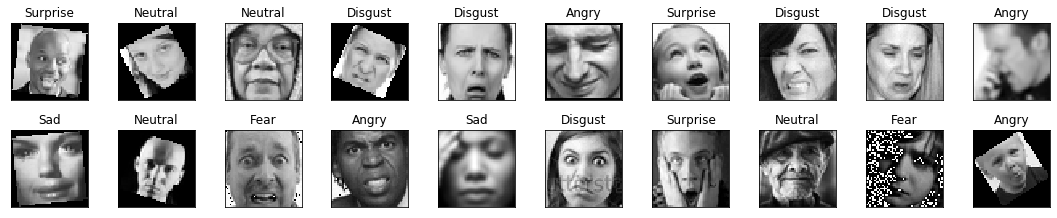

In [14]:
view_random_images(images=transformed_faces, emotions=transformed_emotions, number_of_imgs=20)

In [15]:
faces_full = np.concatenate((faces, transformed_faces))
emotions_full = np.concatenate((emotions, transformed_emotions))

## Create the new database

In [16]:
# After the equalization, we make the new databse
augmented_df = pd.DataFrame()           
for i in range(len(emotions_full)):
    row = pd.Series([emotions_full[i], faces_full[i]], index=["emotion", "pixels"], name=str(i))
    augmented_df = augmented_df.append(row)

In [17]:
# Print the front content of the new databse
augmented_df.head()

,emotion,pixels
0,0.0,"[[70, 80, 82, 72, 58, 58, 60, 63, 54, 58, 60, ..."
1,0.0,"[[151, 150, 147, 155, 148, 133, 111, 140, 170,..."
2,2.0,"[[231, 212, 156, 164, 174, 138, 161, 173, 182,..."
3,4.0,"[[24, 32, 36, 30, 32, 23, 19, 20, 30, 41, 21, ..."
4,6.0,"[[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 15, 2..."


In [18]:
# Print the end of the new database
augmented_df.tail()

,emotion,pixels
62918,6.0,"[[6, 7, 15, 29, 47, 61, 61, 40, 33, 66, 66, 74..."
62919,6.0,"[[35, 43, 59, 83, 109, 142, 161, 148, 157, 131..."
62920,6.0,"[[132, 124, 105, 105, 117, 118, 119, 117, 113,..."
62921,6.0,"[[130, 146, 147, 143, 150, 163, 170, 167, 158,..."
62922,6.0,"[[96, 96, 94, 74, 46, 39, 37, 36, 38, 41, 44, ..."


In [19]:
pixels = augmented_df['pixels'].tolist()

# Convert the list to a numpy array
faces = np.asarray(pixels)
# Expanding the dimension of channel for each image
faces_full_expand = np.expand_dims(faces, -1)
# Converting the labels to catergorical matrix
emotions_categori = pd.get_dummies(augmented_df['emotion']).as_matrix() 

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


## View the balanced database

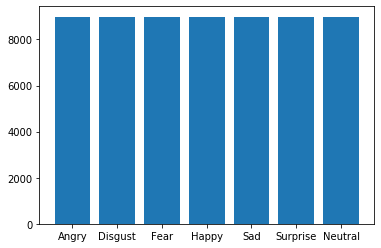

0.0    8989
1.0    8989
2.0    8989
3.0    8989
4.0    8989
5.0    8989
6.0    8989
Name: emotion, dtype: int64


In [20]:
# With this, we checked that the new database really contain equal
# number of pictures
value_counts = augmented_df['emotion'].value_counts().sort_index()
fig, ax = plt.subplots()
x_ticks_labels = [emotion_dict[i] for i in range(len(value_counts))]
plt.bar(range(0, len(value_counts)), value_counts)
plt.xticks(range(0, len(value_counts)), x_ticks_labels)
plt.show()
print(value_counts)

## Split the dataset into train, validation, test datasets

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
# Split the train data into a train and validation group (validation = 20% of the train data)
X_train, X_val, y_train, y_val = train_test_split(faces_full_expand, emotions_categori, test_size=0.2, random_state=30)
# Split the train data into a train and test group (test = 10% of the original train data)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.125, random_state=30)

In [23]:
# Chechk some images from the datasets
# Split the train data into a train and validation group (validation = 20% of the train data)
X_train_view, X_val_view, y_train_view, y_val_view = train_test_split(faces_full, emotions_full, test_size=0.2, random_state=30)
# Split the train data into a train and test group (test = 10% of the original train data)
X_train_view, X_test_view, y_train_view, y_test_view = train_test_split(X_train_view, y_train_view, test_size=0.125, random_state=30)

In [24]:
print("All images:", faces_full.shape[0])
print("X train:", X_train.shape[0], "Y train:", y_train.shape[0])
print("X validaton:", X_val.shape[0], "Y validaton:", y_val.shape[0])
print("X test:", X_test.shape[0], "Y test:", y_test.shape[0])

All images: 62923
X train: 44045 Y train: 44045
X validaton: 12585 Y validaton: 12585
X test: 6293 Y test: 6293


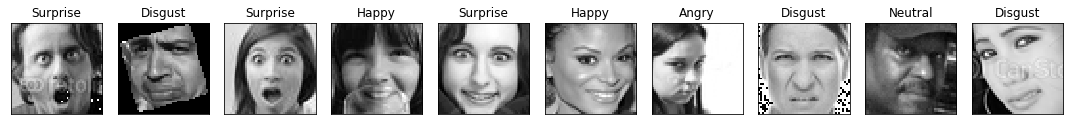

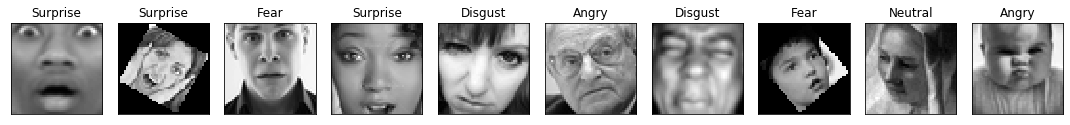

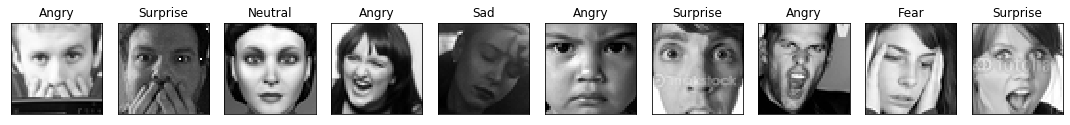

In [25]:
view_random_images(images=X_train_view, emotions=y_train_view, number_of_imgs=10)
view_random_images(images=X_val_view, emotions=y_val_view, number_of_imgs=10)
view_random_images(images=X_test_view, emotions=y_test_view, number_of_imgs=10)

<h1> The completed, splitted database variables is:</h1>
<p> Train: X_train, y_train </p>
<p> Validation: X_val, y_val </p>
<p> Test: X_test, y_test </p>


# Create Network and train

In [26]:
#Include all the necessary keras libraries
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import ReduceLROnPlateau, TensorBoard, EarlyStopping, ModelCheckpoint
from keras.models import load_model

Using TensorFlow backend.


In [27]:
# Init training parameters
num_features = 64 
num_labels = 7 # Seven different emotions
batch_size = 64 # One batch contains 64 images
epochs = 100
width, height = 48, 48  # Image size

In [43]:
model = Sequential()
# Firsrt we defined the conv layers
# All layers have RELU activation function
# First layer has L2 regularization
model.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', input_shape=(width, height, 1), data_format='channels_last', kernel_regularizer=l2(0.01)))
model.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

# Beside the first layer, all the other have batch normalization layers
model.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

# Transform the Inputs to row vector
model.add(Flatten())

# With dense, we define the fully-connected layers 
model.add(Dense(2*2*2*num_features, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2*2*num_features, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2*num_features, activation='relu'))
model.add(Dropout(0.5))

# We use softmax, which make the emotions into probability variable 
model.add(Dense(num_labels, activation='softmax'))

In [44]:
model.summary()  # This is the summary of our model

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 46, 46, 64)        36928     
_________________________________________________________________
batch_normalization_39 (Batc (None, 46, 46, 64)        256       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 23, 23, 128)       73856     
_________________________________________________________________
batch_normalization_40 (Batc (None, 23, 23, 128)      

In [45]:
# Before the compile, we add all the necessary layers.
# model.compile function makes the network
# As for loss, we chose categorical crossentropy, because the emotions are categorical targets
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
              metrics=['accuracy'])

In [46]:
# Adaptive leraning rate
# Change the learning rate value, if it necessarry
lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=3, verbose=1)

In [47]:
# Early stopping if the new validation result is bigger
early_stopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=8, verbose=1, mode='auto')

In [48]:
# Save the best model
checkpointer = ModelCheckpoint('model.h5', monitor='val_loss', verbose=1, save_best_only=True)

In [49]:
# Train with callbacks
model.fit(np.array(X_train), np.array(y_train),
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(np.array(X_val), np.array(y_val)),
          shuffle=True,
          callbacks=[lr_reducer, early_stopper, checkpointer])

Train on 44045 samples, validate on 12585 samples
Epoch 1/100
44045/44045 [==============================] - 158s 4ms/step - loss: 2.0328 - accuracy: 0.1555 - val_loss: 1.9493 - val_accuracy: 0.1655

Epoch 00001: val_loss improved from inf to 1.94932, saving model to model.h5
Epoch 2/100
44045/44045 [==============================] - 144s 3ms/step - loss: 1.9280 - accuracy: 0.1891 - val_loss: 1.8913 - val_accuracy: 0.2093

Epoch 00002: val_loss improved from 1.94932 to 1.89127, saving model to model.h5
Epoch 3/100
44045/44045 [==============================] - 144s 3ms/step - loss: 1.8500 - accuracy: 0.2426 - val_loss: 2.0065 - val_accuracy: 0.1947

Epoch 00003: val_loss did not improve from 1.89127
Epoch 4/100
44045/44045 [==============================] - 144s 3ms/step - loss: 1.7594 - accuracy: 0.3021 - val_loss: 1.8522 - val_accuracy: 0.2346

Epoch 00004: val_loss improved from 1.89127 to 1.85219, saving model to model.h5
Epoch 5/100
44045/44045 [==============================] - 1

# Measuring the performance of our model

In [50]:
# We measure the performance of the trained network
model = load_model('model.h5')
scores = model.evaluate(np.array(X_test), np.array(y_test), batch_size=batch_size)
print("Loss: " + str(scores[0]))
print("Accuracy: " + str(scores[1]))

6293/6293 [==============================] - 6s 971us/step
Loss: 0.8484624702108696
Accuracy: 0.7300174832344055


### Test the model predictions

In [36]:
# Check how many results of the predictions by the treining model is equal with the true y_test results
# y_prob use X_test datas, contains the predictions by the training weights
# y_pred use y_prod, and store predictions -  find out the biggest number of the predictions
y_prob = model.predict(X_test, batch_size=32, verbose=0)
y_pred = [np.argmax(prob) for prob in y_prob]

# We use y_true for check function
y_true = [np.argmax(true) for true in y_test]

cntr = 0 # good predictions number
i = 0
# Save the prediction into csv file
file = open('prediction.csv', 'w')
for p in y_pred:
    if y_true[i] == p:
        cntr += 1
    file.write(str(p) + "," + str(y_true[i]))
    file.write("\n")
    i += 1
print("True positive predictions number: ", cntr)
print((cntr/i)*100, "%")

file.close()

True positive predictions number:  4560
72.46146511997458 %


### Dispersion of the predictions visualization

In [61]:
# Find out some images and plot with predictions and compared it with the officially true value
# Marked out if it has a wrong prediction
def plot_preds(start, end, y_pred, y_true, title=False):
    fig = plt.figure(figsize=(12,12))
    # dictionary of the emotions
    emotion = {0:'Angry', 1: "Disgust", 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}
    for i in range(start, end+1):
        # plot the images
        input_img = X_test[i:(i+1),:,:,:]
        input_img = np.reshape(input_img, (48, 48))
        ax = fig.add_subplot(6,6,i+1)
        ax.imshow(input_img, cmap=matplotlib.cm.gray)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
        # plot the labels
        if y_pred[i] != y_true[i]:
            plt.xlabel("Pred: " + emotion[y_pred[i]] + " True: " + emotion[y_true[i]], color='#FF4500', fontsize=10)
        else:
            plt.xlabel("Pred: " + emotion[y_pred[i]] + " True: " + emotion[y_true[i]], fontsize=10)
        if title:
            plt.title(emotion[y_pred[i]], color='blue')
        plt.tight_layout()
    plt.show()

In [62]:
# plot the dispersion of the predictions probability
def plot_probs(start,end, y_prob):
    fig = plt.figure(figsize=(12,12))
    for i in range(start, end+1):
        ax = fig.add_subplot(6,6,i+1)
        ax.bar(np.arange(0,7), y_prob[i], alpha=0.5)
        ax.set_xticks(np.arange(0.5,7.5,1))
        labels = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise','neutral']
        ax.set_xticklabels(labels, rotation=90, fontsize=10)
        ax.set_yticks(np.arange(0.0,1.1,0.5))
        plt.tight_layout()
    plt.show()

In [63]:
def plot_preds_with_probs(start, end, y_prob):
    iter = (end - start)//7
    for i in np.arange(0,iter):
        plot_preds(i*6,(i+1)*6-1, y_pred, y_true, title=False)
        plot_probs(i*6,(i+1)*6-1, y_prob)

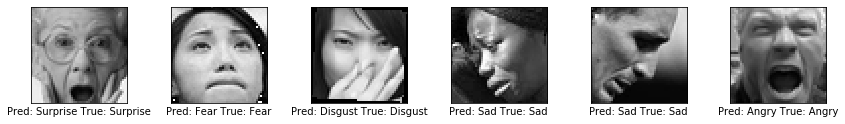

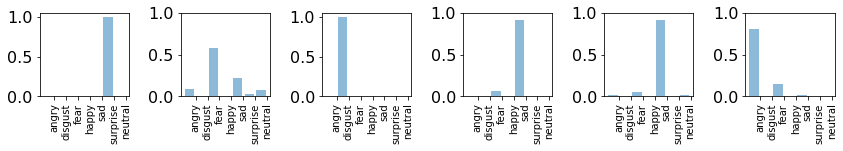

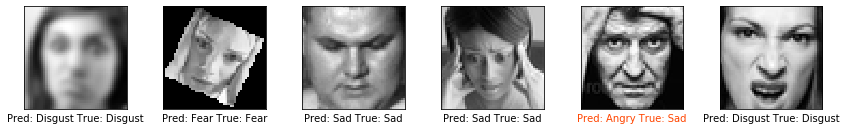

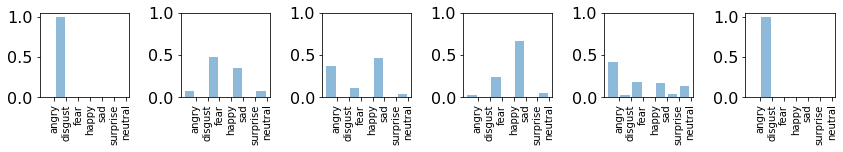

In [64]:
plot_preds_with_probs(0, 18, y_prob)

### Confusion Matrix

In [45]:
# Error matrix to visualize the performance of our algorithm
from sklearn.metrics import confusion_matrix

labels = ['angry', 'disgust','fear', 'happy', 'sad', 'surprise', 'neutral']
def plot_confusion_matrix(y_true, y_pred, cmap=plt.cm.Blues):
    # Confusion mx with the loaded probes (previous steps)
    confm = confusion_matrix(y_true, y_pred)
    # make a Spectacular visualization
    fig = plt.figure(figsize=(6,6))
    matplotlib.rcParams.update({'font.size': 16})
    ax  = fig.add_subplot(111)
    matrix = ax.imshow(confm, interpolation='nearest', cmap=cmap)
    fig.colorbar(matrix) 
    # set axies values and labels
    # write values into plot
    for i in range(0,7):
        for j in range(0,7):  
            ax.text(j,i,confm[i,j],va='center', ha='center')
    ticks = np.arange(len(labels))
    # Set the x ticks with list of ticks
    ax.set_xticks(ticks)
    # write labeles by rot
    ax.set_xticklabels(labels, rotation=45)
    # Set the y ticks with list of ticks
    ax.set_yticks(ticks)
    # write labels list
    ax.set_yticklabels(labels)
    # plot
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

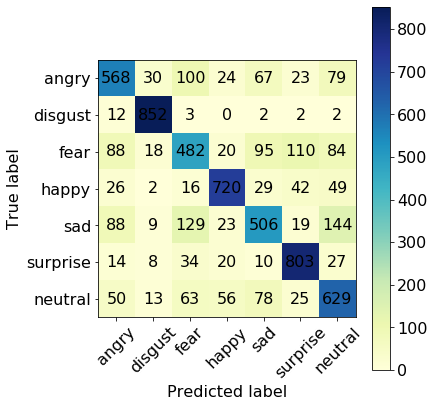

In [46]:
plot_confusion_matrix(y_true, y_pred, cmap=plt.cm.YlGnBu)

## Result of the model training:

 * The model accuracy: approx. 73%
 * The model weights save into model.h5 file
 * We checked the trainig by the test datas and save the predictions into prediciton.csv file
 * As we can see the confusion matrix the most values is in the diagonal, but sometimes it has mistake also
 * Disgust, happy, surprise is the most true predicted values and fear is the least.